# IPA transcriptions grammar

This notebook demonstrates a basic [Lark](https://lark-parser.readthedocs.io/en/latest/) grammar for validating transcriptions using symbols from the [International Phonetic Alphabet (IPA)](https://en.wikipedia.org/wiki/International_Phonetic_Alphabet).

If you want to graphically visualize parse trees from IPA transcriptions, you'll need to install `graphiz`: https://graphviz.org/

In [1]:
from lark import Lark

def load_grammar(filename='ipa.lark'):
    """Return a lark parser from the given .lark grammar"""
    with open(filename, mode='r') as f:
        return Lark(f.read(), start='transcription')

def pretty_parse(sentence, parser):
    """Parse a given 'sentence' with the given parser and pretty-print the parse tree"""
    try:
        print(parser.parse(sentence).pretty())
    except Exception as e:
        print(e)


In [2]:
parser = load_grammar()

In [3]:
pretty_parse('/ˈɡɹæ.məɹ/', parser)

transcription
  phonemic
    syllables
      None
      ˈ
      syllable
        onset
          consonant
            ɡ
            None
          consonant
            ɹ
            None
        rime
          nucleus
            vowel
              æ
              None
              None
          coda
      None
      suprasegmental	.
      syllable
        onset
          consonant
            m
            None
        rime
          nucleus
            vowel
              ə
              None
              None
          coda
            consonant
              ɹ
              None



In [4]:
pretty_parse('/ˈɡɹæ.mə(ɹ)/', parser)

No terminal matches '(' in the current parser context, at line 1 col 9

/ˈɡɹæ.mə(ɹ)/
        ^
Expected one of: 
	* TONEMARK
	* __ANON_0
	* TONESTEP
	* V
	* SLASH
	* LEFTTONECONTOUR
	* BREAK
	* LENGTH
	* VFEATURE
	* DOUBLEBREVE
	* XFEATURE
	* RIGHTTONECONTOUR
	* STRESS
	* VBAR
	* LINK
	* C



In [5]:
from lark import tree
tree.pydot__tree_to_dot(parser.parse('/ˈɡɹæ.məɹ/'), 'parse.gv')

In [6]:
!dot -Tpng -o parse.png parse.gv

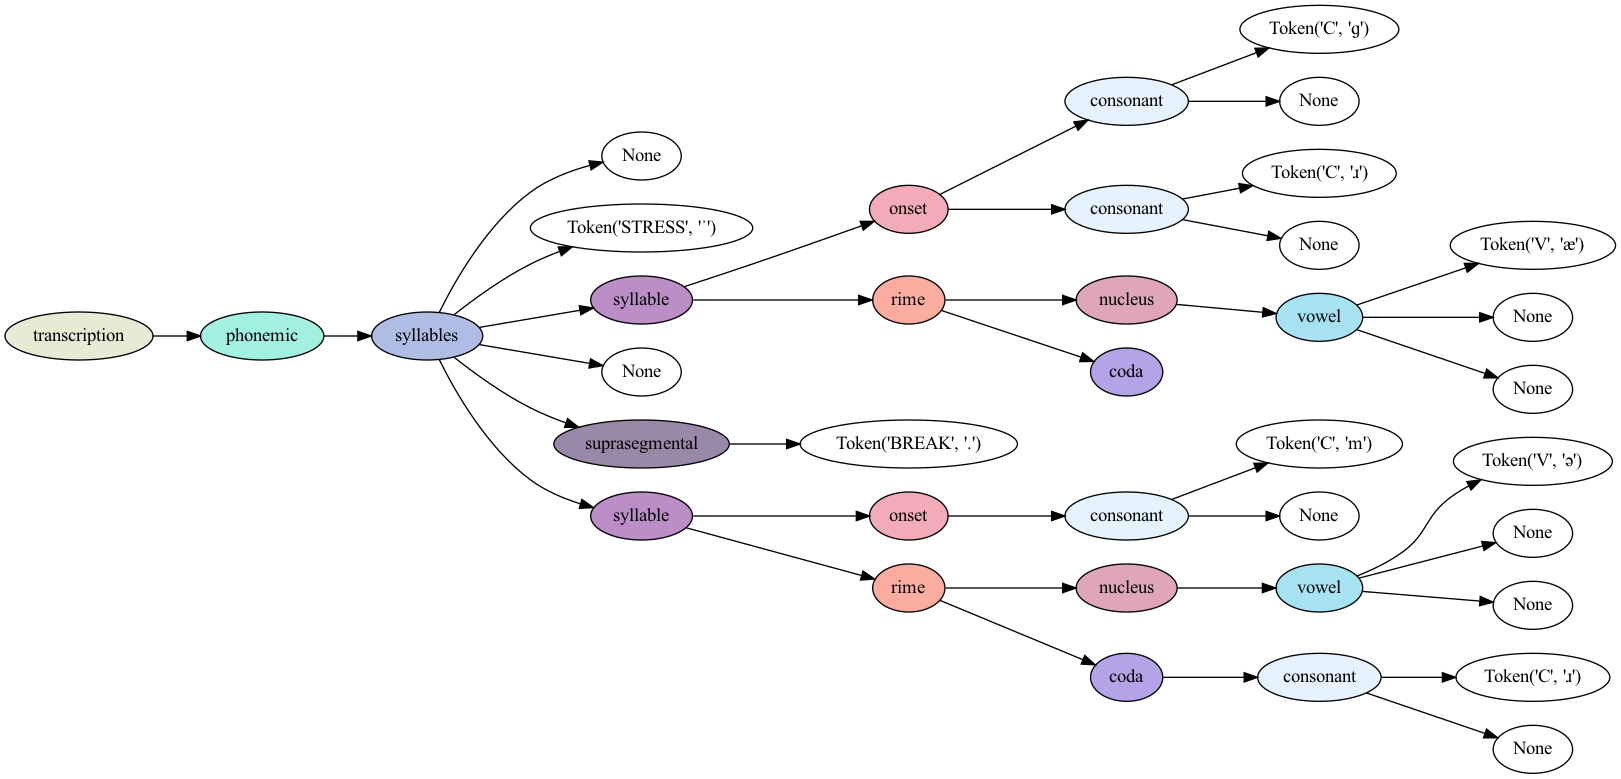

In [7]:
from IPython.display import Image
Image(filename='parse.png') 

In [8]:
pretty_parse('[kʰæt]', parser)

transcription
  phonetic
    syllables
      None
      None
      syllable
        onset
          consonant
            k
            cfeatures
              cfeature	ʰ
        rime
          nucleus
            vowel
              æ
              None
              None
          coda
            consonant
              t
              None



In [9]:
tree.pydot__tree_to_dot(parser.parse('[kʰæt]'), 'cat.gv')

In [10]:
!dot -Tpng -o cat.png cat.gv

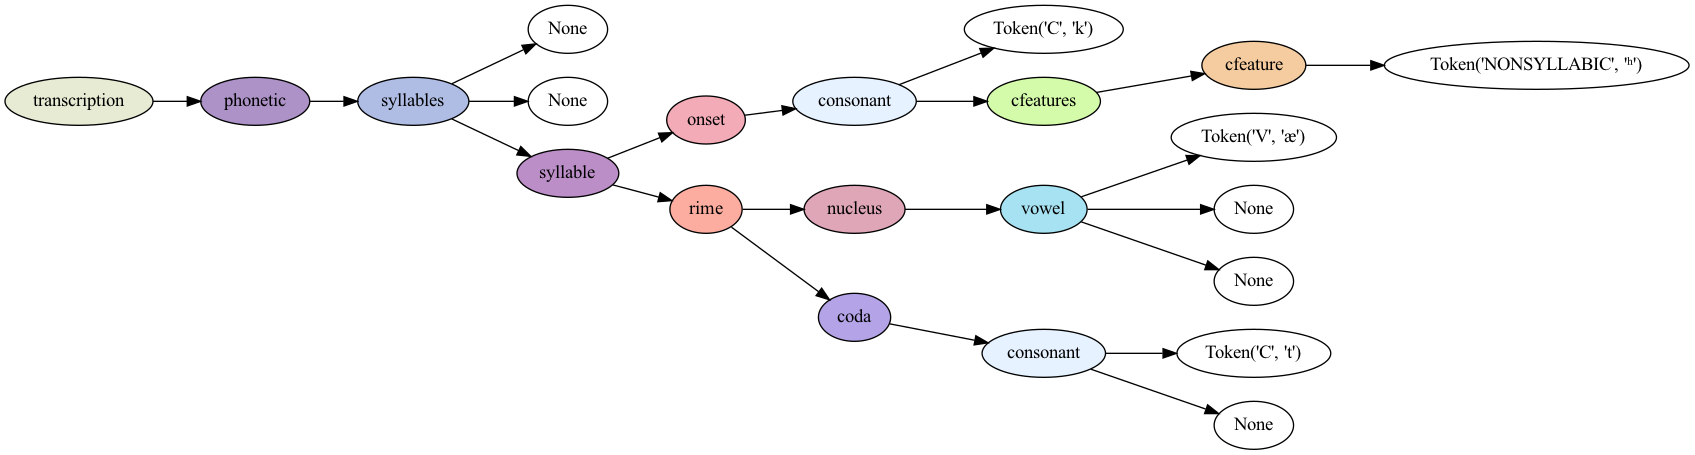

In [11]:
Image(filename='cat.png')

In [12]:
!./tests/run.zsh

/mǎi mài mâi mái/ PASS
/ˈkatən/ PASS
[ˈkhætn̩] PASS
[ˈdʒæk|pɹəˌpɛəɹɪŋ ðə ˈweɪ|wɛnt ˈɒn‖] PASS
[↑bɪn.ðɛɹ↘|↑dɐn.ðæt↘‖] PASS
[túrán↑tʃí nè] PASS
[xɤn˧˥ xaʊ˨˩˦] PASS
[ˈɹɪðm̩] PASS
[ˈhuːˀsð̩ɣ] PASS
[ˈsr̩t͡sɛ] PASS
[ɹ̝̍] PASS
[ʙ̞̍] PASS
èlʊ́kʊ́nyá PASS
huʔ˩˥ PASS
mā PASS
nu.jam.ɬ̩ PASS
a˩˥˥˩˦˥˩˨˧˦˧ PASS
[u ↑ˈvẽ.tu ˈnɔ.ɾtɯ ku.mɯˈso.ɐ.suˈpɾaɾ.kõˈmũi.tɐ ˩˧fu.ɾiɐ | mɐʃ ↑ˈku̯ɐ̃.tu.maiʃ.su˩˧pɾa.vɐ | maiz ↑u.viɐ↓ˈʒɐ̃.tɯ.si.ɐk.õʃ↓ˈɡa.va.suɐ ˧˩ka.pɐ | ɐˈtɛ ↑kiu ˈvẽ.tu ˈnɔɾ.tɯ ˧˩d̥z̥ʃtiu ǁ] PASS
( while read l; do; echo -n "$l " | tee /dev/stderr | ( ./ipa_grammar.py - > )  5.30s user 0.62s system 96% cpu 6.145 total
